In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging

import pyabc
from pyabc import Distribution, RV, ABCSMC

pyabc.settings.set_figure_params('pyabc')  # for beautified plots

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)

## Model 1 (Normal distribution)

In [2]:
def model(p):
    """One informative, one uninformative statistic"""
    return {
        's1': p['theta'] + 0.1 * np.random.normal(),
        's2': 1 * np.random.normal(),
    }

obs = {'s1': 0, 's2': 0}

#prior = Distribution(theta=RV('uniform', -5, 10))
prior = Distribution(theta=RV('norm', loc=0, scale=100))

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,1)
    ax = [ax]
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=-20, xmax=20, numx=300,
                                        x='theta', xname="$\theta$", ax=ax[0],
                                        label="PDF t={}".format(t))
    ax[0].axvline(0, color='k', linestyle='dashed', label="True value")
    ax[0].legend()
    ax[0].set_title(label)

In [3]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.


Euclidean


INFO:History:Start <ABCSMC id=6, start_time=2021-03-25 11:01:34.317178>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 66.02381103996507
INFO:ABC:t: 0, eps: 66.02381103996507.
INFO:ABC:Acceptance rate: 100 / 233 = 4.2918e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 29.537236054982266.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=9.9564e+01.
INFO:ABC:t: 2, eps: 16.675465367597695.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=9.7578e+01.
INFO:ABC:t: 3, eps: 8.229127126447805.
INFO:ABC:Acceptance rate: 100 / 192 = 5.2083e-01, ESS=9.9253e+01.
INFO:ABC:t: 4, eps: 4.384503551392136.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01, ESS=9.9660e+01.
INFO:ABC:t: 5, eps: 2.3767078066577496.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=9.9882e+01.
INFO:ABC:t: 6, eps: 1.4661829165278866.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=9.8888e+01.
INFO:ABC:t: 7, eps: 1.0666133526463075.
INFO:ABC:Acceptance rate: 100 / 225 = 4.4444e-01, ESS=9.9632e+01.

Calibrated Euclidean


DEBUG:Distance:Weights[0] = {'s1': 0.015886268313202112, 's2': 1.5481610835995898}
INFO:Epsilon:initial epsilon is 1.8858340734708654
INFO:ABC:t: 0, eps: 1.8858340734708654.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.2549109822745272.
INFO:ABC:Acceptance rate: 100 / 291 = 3.4364e-01, ESS=9.8863e+01.
INFO:ABC:t: 2, eps: 0.8764764104418702.
INFO:ABC:Acceptance rate: 100 / 346 = 2.8902e-01, ESS=9.8279e+01.
INFO:ABC:t: 3, eps: 0.5988250207125163.
INFO:ABC:Acceptance rate: 100 / 563 = 1.7762e-01, ESS=9.9560e+01.
INFO:ABC:t: 4, eps: 0.41400987130762856.
INFO:ABC:Acceptance rate: 100 / 722 = 1.3850e-01, ESS=9.8196e+01.
INFO:ABC:t: 5, eps: 0.3214670207293507.
INFO:ABC:Acceptance rate: 100 / 961 = 1.0406e-01, ESS=9.8166e+01.
INFO:ABC:t: 6, eps: 0.21781160998350146.
INFO:ABC:Acceptance rate: 100 / 1318 = 7.5873e-02, ESS=9.7577e+01.
INFO:ABC:t: 7, eps: 0.13919523680785081.
INFO:ABC:Acceptance rate: 100 / 2104 = 4.7529e-02, ESS=9.7668e+01.
INFO:ABC:t: 8

Adaptive Euclidean


DEBUG:Distance:Weights[0] = {'s1': 0.015683351725570373, 's2': 1.5051139238846456}
INFO:Epsilon:initial epsilon is 1.7686366614976756
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.7686366614976756.
INFO:ABC:Acceptance rate: 100 / 233 = 4.2918e-01, ESS=1.0000e+02.
DEBUG:Distance:Weights[1] = {'s1': 0.015610878753434717, 's2': 1.368543431935795}
INFO:ABC:t: 1, eps: 1.0757591589866504.
INFO:ABC:Acceptance rate: 100 / 295 = 3.3898e-01, ESS=9.9066e+01.
DEBUG:Distance:Weights[2] = {'s1': 0.02768222992106156, 's2': 1.444776808504064}
INFO:ABC:t: 2, eps: 1.0126311619679789.
INFO:ABC:Acceptance rate: 100 / 394 = 2.5381e-01, ESS=9.8754e+01.
DEBUG:Distance:Weights[3] = {'s1': 0.036966762362547576, 's2': 1.44185695349702}
INFO:ABC:t: 3, eps: 0.7973984759364352.
INFO:ABC:Acceptance rate: 100 / 473 = 2.1142e-01, ESS=9.9812e+01.
DEBUG:Distance:Weights[4] = {'s1': 0.06648591956890296, 's2': 1.5089251095632013}
INFO:ABC:t: 4, eps: 0.8086064616764869.
INFO:ABC:Acceptance 

Learned linear


INFO:Epsilon:initial epsilon is 0.8331233220439432
INFO:ABC:t: 0, eps: 0.8331233220439432.
INFO:ABC:Acceptance rate: 100 / 228 = 4.3860e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.3603491651861799.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=9.8494e+01.
INFO:ABC:t: 2, eps: 0.14568397694976484.
INFO:ABC:Acceptance rate: 100 / 224 = 4.4643e-01, ESS=9.9334e+01.
INFO:ABC:t: 3, eps: 0.062463646806310794.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=9.9757e+01.
INFO:ABC:t: 4, eps: 0.0286669321824441.
INFO:ABC:Acceptance rate: 100 / 237 = 4.2194e-01, ESS=9.9831e+01.
INFO:ABC:t: 5, eps: 0.014021792367958872.
INFO:ABC:Acceptance rate: 100 / 219 = 4.5662e-01, ESS=9.9132e+01.
INFO:ABC:t: 6, eps: 0.0070826106565875695.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=9.6869e+01.
INFO:ABC:t: 7, eps: 0.0035552816255546944.
INFO:ABC:Acceptance rate: 100 / 242 = 4.1322e-01, ESS=9.8861e+01.
INFO:ABC:t: 8, eps: 0.0016515970777006626.
INFO:ABC:Acceptance rate: 100 / 228 = 4.3860e-0

GP


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
INFO:Epsilon:initial epsilon is 0.7252400345181582
INFO:ABC:t: 0, eps: 0.7252400345181582.
INFO:ABC:Acceptance rate: 100 / 201 = 4.9751e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.37759933735438583.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=9.9627e+01.
INFO:ABC:t: 2, eps: 0.16637207449433855.

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

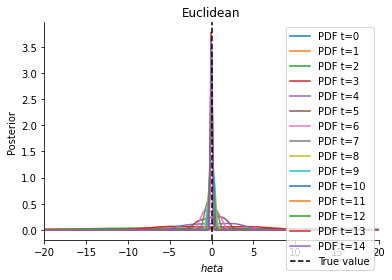

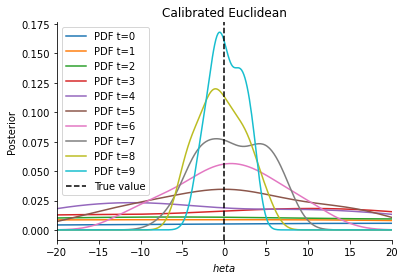

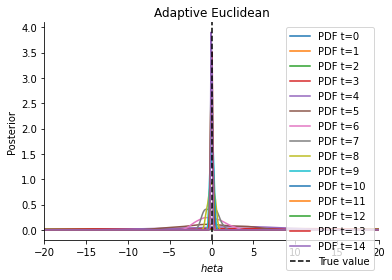

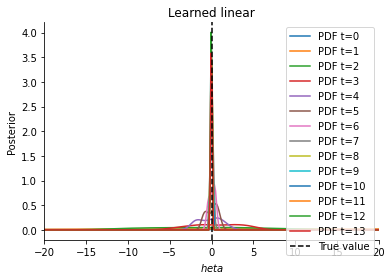

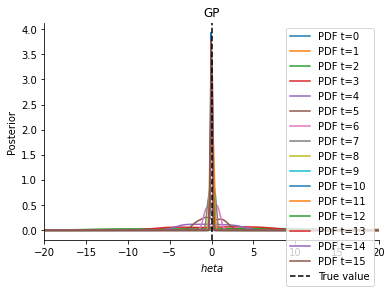

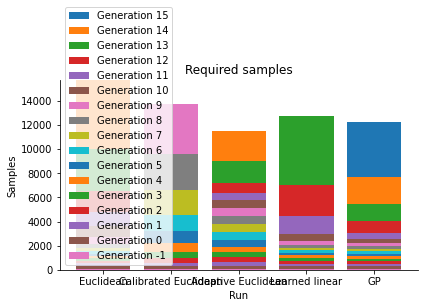

In [4]:
for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

## Model 2 (GK)

In [8]:
def gk(A, B, c, g, k, n: int = 1):
    """One informative, one uninformative statistic"""
    z = np.random.normal(size=n)
    e = np.exp(- g * z)
    return A + B * (1 + c * (1 - e) / (1 + e)) * (1 + z**2)**k * z

def model(p):
    A, B, g, k = [p[key] for key in ['A', 'B', 'g', 'k']]
    c = 0.8
    vals = gk(A=A, B=B, c=c, g=g, k=k, n=10000)
    ordered = np.sort(vals)
    subset = ordered[1250:8751:1250]
    return {'y': subset}

p_true = {'A': 3, 'B': 1, 'g': 1.5, 'k': 0.5}

obs = model(p_true)

#prior = Distribution(theta=RV('uniform', -5, 10))
prior = Distribution(A=RV('uniform', 0, 10),
                     B=RV('uniform', 0, 10),
                     g=RV('uniform', 0, 10),
                     k=RV('uniform', 0, 10))

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

bounds = {key: (0, 10) for key in ['A', 'B', 'g', 'k']}

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1, 1)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_matrix(
            df, w, limits=limits, label="PDF t={}".format(t), ax=ax)

In [9]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=1000)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=12, start_time=2021-03-25 11:03:42.273522>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 534.7859950097085
INFO:ABC:t: 0, eps: 534.7859950097085.
INFO:ABC:Acceptance rate: 1000 / 2006 = 4.9850e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 65.7421506915185.
INFO:ABC:Acceptance rate: 1000 / 2170 = 4.6083e-01, ESS=8.3136e+02.
INFO:ABC:t: 2, eps: 23.959800287777412.
INFO:ABC:Acceptance rate: 1000 / 2338 = 4.2772e-01, ESS=8.1420e+02.
INFO:ABC:t: 3, eps: 13.624305070028644.
INFO:ABC:Acceptance rate: 1000 / 2191 = 4.5641e-01, ESS=7.6683e+02.
INFO:ABC:t: 4, eps: 7.869535315972258.
INFO:ABC:Acceptance rate: 1000 / 2273 = 4.3995e-01, ESS=4.9473e+02.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=12, duration=0:00:29.418981, end_time=2021-03-25 11:04:11.692503>
INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=13, start_time=2021-03-25 11:04:11.722489>
INFO:ABC:Calibration sample t=-1.


Calibrated Euclidean


DEBUG:Distance:Weights[0] = {'y::0': 0.013334089771806985, 'y::1': 0.1773588725746126, 'y::2': 0.39336868516643936, 'y::3': 0.39772251403943487, 'y::4': 0.3656768270516354, 'y::5': 0.041833716108387216, 'y::6': 0.0020903270435823854}
INFO:Epsilon:initial epsilon is 4.597549185861716
INFO:ABC:t: 0, eps: 4.597549185861716.
INFO:ABC:Acceptance rate: 1000 / 1988 = 5.0302e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 2.45774386902545.
INFO:ABC:Acceptance rate: 1000 / 2115 = 4.7281e-01, ESS=8.1110e+02.
INFO:ABC:t: 2, eps: 1.6231754949142132.
INFO:ABC:Acceptance rate: 1000 / 2036 = 4.9116e-01, ESS=7.8398e+02.
INFO:ABC:t: 3, eps: 1.112808238887398.
INFO:ABC:Acceptance rate: 1000 / 2197 = 4.5517e-01, ESS=8.7876e+02.
INFO:ABC:t: 4, eps: 0.7626681530905202.
INFO:ABC:Acceptance rate: 1000 / 2181 = 4.5851e-01, ESS=8.5986e+02.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=13, duration=0:00:25.598818, end_time=2021-03-25 11:04:37.321307>
INFO:Sampler:Parallelizing the sa

Adaptive Euclidean


DEBUG:Distance:Weights[0] = {'y::0': 0.01465006685869957, 'y::1': 0.17989265755652667, 'y::2': 0.3823759839378102, 'y::3': 0.3856518112839678, 'y::4': 0.34472000715100776, 'y::5': 0.047354554340539375, 'y::6': 0.002185277407617176}
INFO:Epsilon:initial epsilon is 4.478978667407188
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 4.478978667407188.
INFO:ABC:Acceptance rate: 1000 / 2023 = 4.9432e-01, ESS=1.0000e+03.
DEBUG:Distance:Weights[1] = {'y::0': 0.013551157022237184, 'y::1': 0.18355698413315819, 'y::2': 0.39262656793562584, 'y::3': 0.39253661516366484, 'y::4': 0.3658614376428118, 'y::5': 0.044414114761290854, 'y::6': 0.0019887041016677987}
INFO:ABC:t: 1, eps: 2.4650523424252526.
INFO:ABC:Acceptance rate: 1000 / 2021 = 4.9480e-01, ESS=8.0108e+02.
DEBUG:Distance:Weights[2] = {'y::0': 0.08560800878955535, 'y::1': 0.3681121797025244, 'y::2': 0.4731936071387055, 'y::3': 0.4826498140092382, 'y::4': 0.4560096742553653, 'y::5': 0.13612113401365786, 'y::6': 0.012

Learned linear


INFO:Epsilon:initial epsilon is 2.2301601901319232
INFO:ABC:t: 0, eps: 2.2301601901319232.
INFO:ABC:Acceptance rate: 1000 / 1896 = 5.2743e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 1.4099423664608464.
INFO:ABC:Acceptance rate: 1000 / 2022 = 4.9456e-01, ESS=8.0796e+02.
INFO:ABC:t: 2, eps: 0.9464767677244441.
INFO:ABC:Acceptance rate: 1000 / 1976 = 5.0607e-01, ESS=7.6436e+02.
INFO:ABC:t: 3, eps: 0.6515615504966894.
INFO:ABC:Acceptance rate: 1000 / 1902 = 5.2576e-01, ESS=8.6788e+02.
INFO:ABC:t: 4, eps: 0.4642589607193872.
INFO:ABC:Acceptance rate: 1000 / 2104 = 4.7529e-01, ESS=8.4383e+02.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=15, duration=0:00:28.652334, end_time=2021-03-25 11:05:36.636880>
INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=16, start_time=2021-03-25 11:05:36.701801>
INFO:ABC:Calibration sample t=-1.


GP


INFO:Epsilon:initial epsilon is 2.126469079298268
INFO:ABC:t: 0, eps: 2.126469079298268.
INFO:ABC:Acceptance rate: 1000 / 2042 = 4.8972e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 1.3317302961156794.
INFO:ABC:Acceptance rate: 1000 / 2033 = 4.9188e-01, ESS=8.5265e+02.
INFO:ABC:t: 2, eps: 0.8957860968880842.
INFO:ABC:Acceptance rate: 1000 / 1934 = 5.1706e-01, ESS=8.5414e+02.
INFO:ABC:t: 3, eps: 0.630531501970853.
INFO:ABC:Acceptance rate: 1000 / 2075 = 4.8193e-01, ESS=7.6955e+02.
INFO:ABC:t: 4, eps: 0.4432927119809979.
INFO:ABC:Acceptance rate: 1000 / 2093 = 4.7778e-01, ESS=8.7115e+02.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=16, duration=0:00:35.370169, end_time=2021-03-25 11:06:12.071970>


<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

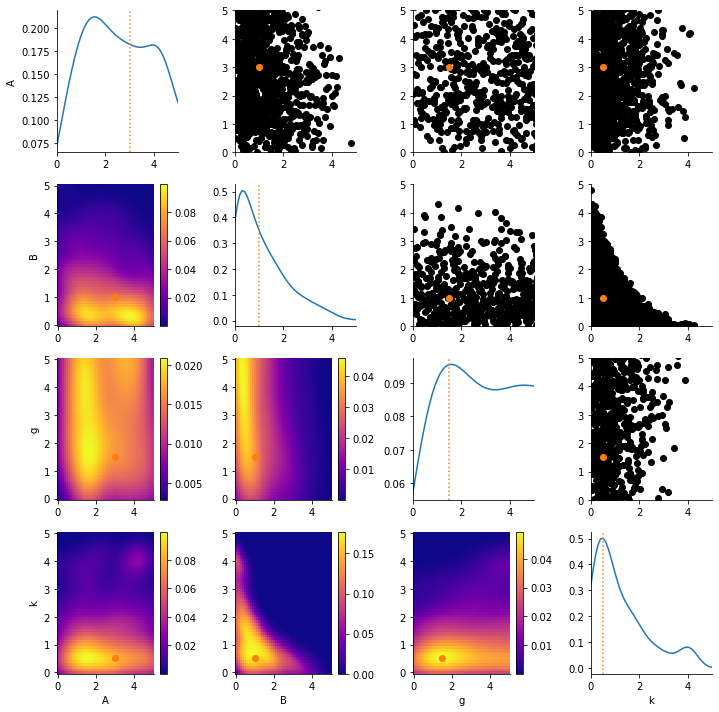

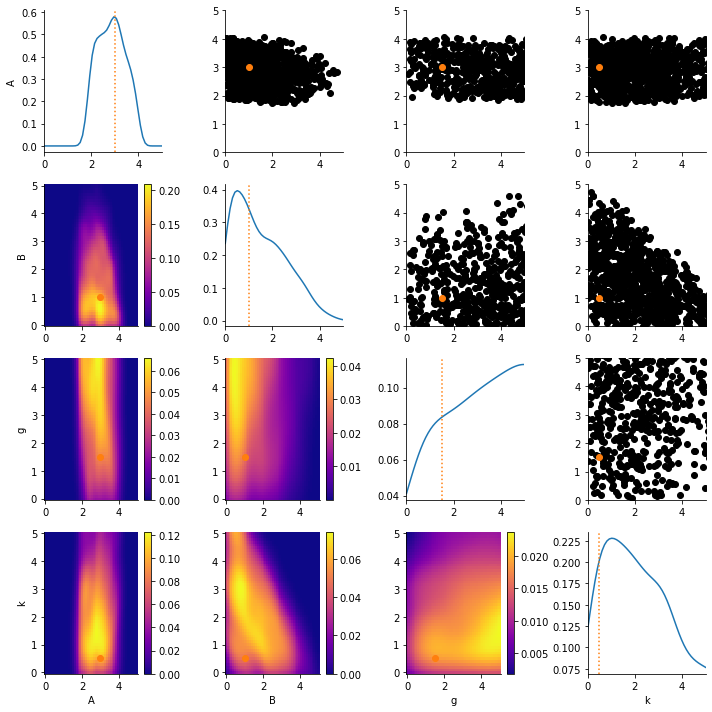

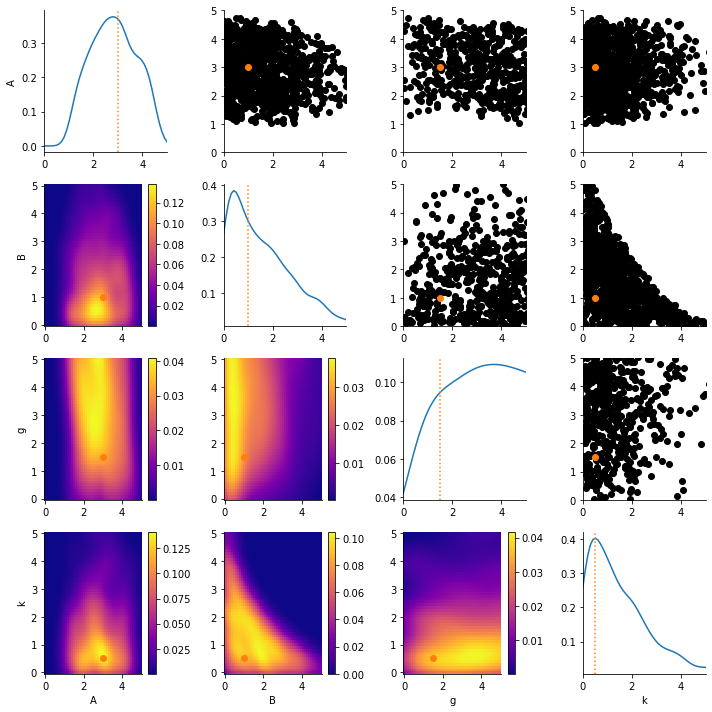

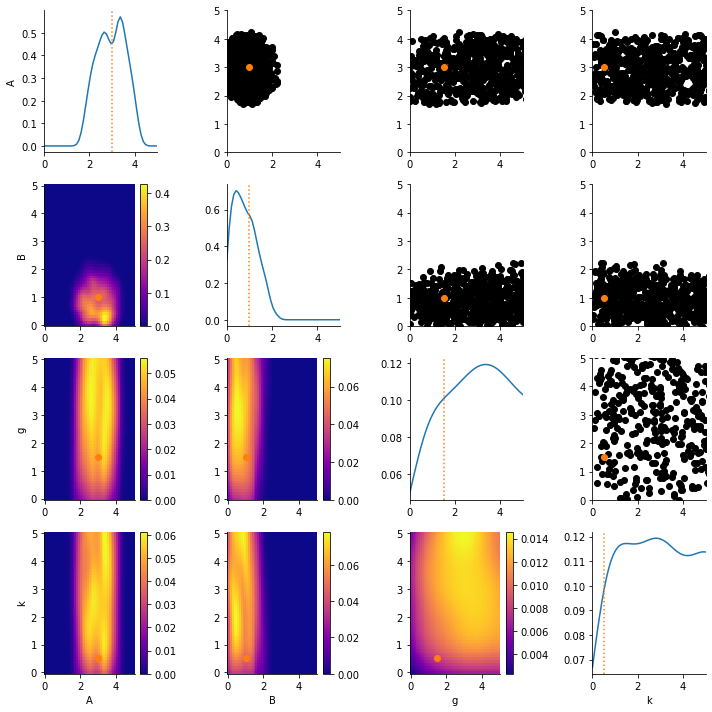

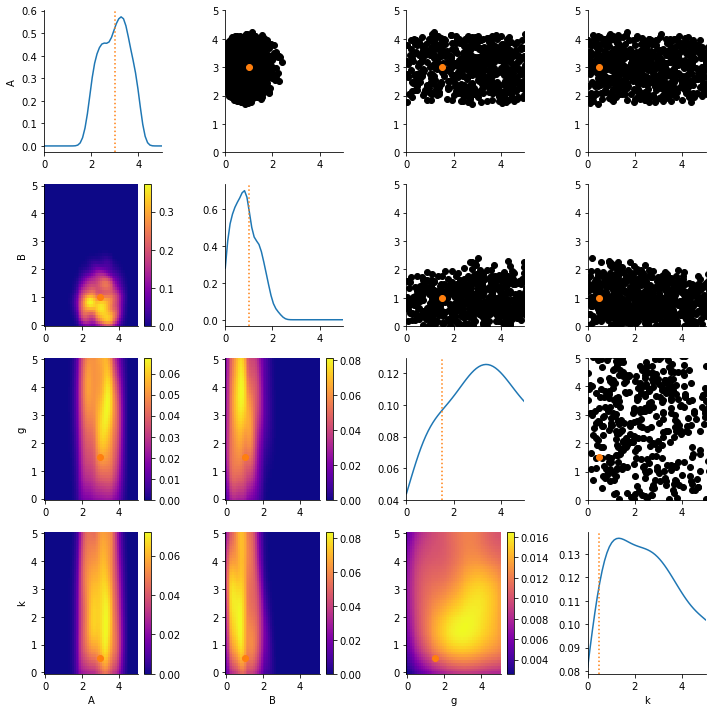

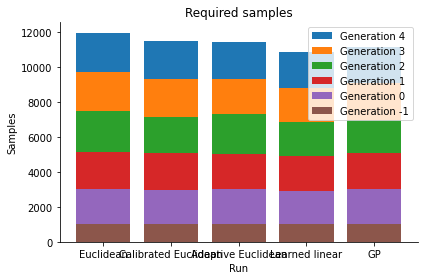

In [11]:
limits = {key: (0, 5) for key in ['A', 'B', 'g', 'k']}

def plot_history(history: pyabc.History, label: str):
    #fig, ax = plt.subplots(1, 1)
    df, w = history.get_distribution(m=0)
    pyabc.visualization.plot_kde_matrix(
        df, w, limits=limits, refval=p_true)

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

## Model 3 (Lotka-Volterra)

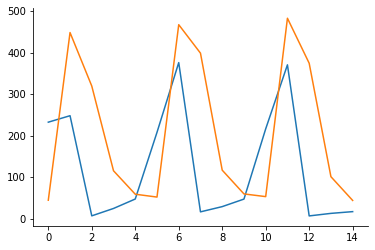

In [3]:
import ssa

reactants = np.array([[1, 0],
                      [1, 1],
                      [0, 1]])
products = np.array([[2, 0],
                     [0, 2],
                     [0, 0]])

x0 = np.array([50, 100])
p_true = {'p1': np.log(1), 'p2': np.log(0.005), 'p3': np.log(0.6)}
t_max = 32
output = ssa.output.FullOutput()
output = ssa.output.ArrayOutput(ts=np.arange(2, 32, 2))

sigma = np.exp(2.3)

def model(p):
    k = np.array([p['p1'], p['p2'], p['p3']])
    # log parameters
    k = np.exp(k)
    ssa_model = ssa.Model(reactants, products, x0=x0, k=k, t_max=t_max, max_reactions=1e5, output=output)
    try:
        ret = ssa_model.simulate()
        # shape: (t, 2)
        sims = ret.list_xs[0]
    except ValueError:
        sims = np.empty_like(obs['y'])
        sims[:] = np.nan

    return {
        'y': sims + sigma * np.random.normal(size=sims.shape),
    }

np.random.seed(0)
obs = model(p_true)

plt.plot(obs['y'][:,0])
plt.plot(obs['y'][:,1])

prior = Distribution(p1=RV('uniform', -6, 8),
                     p2=RV('uniform', -6, 8),
                     p3=RV('uniform', -6, 8))

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

limits = {key: (-6, 2) for key in ['p1', 'p2', 'p3', 'p4']}

def plot_history(history: pyabc.History, label: str):
    #fig, ax = plt.subplots(1, 1)
    df, w = history.get_distribution(m=0)
    pyabc.visualization.plot_kde_matrix(
        df, w, limits=limits, refval=p_true)

In [5]:
obs['y'].shape

(15, 2)

In [4]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=5000)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=17, start_time=2021-03-25 11:14:29.150812>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 1175.8537757575227
INFO:ABC:t: 0, eps: 1175.8537757575227.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1022.3707158578186.
INFO:ABC:Acceptance rate: 100 / 239 = 4.1841e-01, ESS=6.1535e+01.
INFO:ABC:t: 2, eps: 1003.4232789699986.
INFO:ABC:Acceptance rate: 100 / 338 = 2.9586e-01, ESS=8.1133e+01.
INFO:ABC:t: 3, eps: 994.5027686923696.
INFO:ABC:Acceptance rate: 100 / 493 = 2.0284e-01, ESS=7.7032e+01.
INFO:ABC:t: 4, eps: 986.6379758922981.
INFO:ABC:Acceptance rate: 100 / 633 = 1.5798e-01, ESS=8.0635e+01.
INFO:ABC:t: 5, eps: 978.7065544930285.
INFO:ABC:Acceptance rate: 100 / 552 = 1.8116e-01, ESS=7.9106e+01.
INFO:ABC:t: 6, eps: 968.1075614763693.
INFO:ABC:Acceptance rate: 100 / 355 = 2.8169e-01, ESS=4.6581e+01.
INFO:ABC:t: 7, eps: 958.387473789946.
INFO:ABC:Acceptance rate: 100 / 540 = 1.8519e-01, ESS=4.3521e+01.
INFO:ABC:t: 8, eps: 950.1384925471572.
INFO:ABC:Acceptance rate: 100 / 656 = 1.5244e-01, ESS=2.7909e+01.
IN

Calibrated Euclidean


DEBUG:Distance:Weights[0] = {'y::0': 0.12560351684844182, 'y::1': 0.03960251057073473, 'y::2': 0.14008680749569855, 'y::3': 0.031024913715349704, 'y::4': 0.17315450800078155, 'y::5': 0.029433998746582816, 'y::6': 0.15677746111988683, 'y::7': 0.022920877279259035, 'y::8': 0.14358038388263022, 'y::9': 0.018400667571207962, 'y::10': 0.12576610205371008, 'y::11': 0.018602844245521583, 'y::12': 0.12411198511403974, 'y::13': 0.01814159716591278, 'y::14': 0.1262147254321801, 'y::15': 0.016115301337765297, 'y::16': 0.15354780831158155, 'y::17': 0.015318399216426748, 'y::18': 0.15453240581603425, 'y::19': 0.016231398544007944, 'y::20': 0.14023551798411032, 'y::21': 0.016313520401277613, 'y::22': 0.14025251202362313, 'y::23': 0.01619011933086621, 'y::24': 0.1411838684108724, 'y::25': 0.016182240573641402, 'y::26': 0.13079389712007414, 'y::27': 0.01652650689693431, 'y::28': 0.13429863069184347, 'y::29': 0.018740047238810655}
INFO:Epsilon:initial epsilon is 95.0709821847712
INFO:ABC:t: 0, eps: 95.

Adaptive Euclidean


DEBUG:Distance:Weights[0] = {'y::0': 0.12332780522617913, 'y::1': 0.03153062777472445, 'y::2': 0.15133416391856652, 'y::3': 0.029148408960917648, 'y::4': 0.1278500568683527, 'y::5': 0.020112265430447696, 'y::6': 0.1322205706741691, 'y::7': 0.02003264770477717, 'y::8': 0.14419346402409786, 'y::9': 0.0161589221456615, 'y::10': 0.14695526547844664, 'y::11': 0.016491322993394557, 'y::12': 0.13339226882583735, 'y::13': 0.016116088255444017, 'y::14': 0.13629138651797304, 'y::15': 0.017472691154975406, 'y::16': 0.1501824633340001, 'y::17': 0.01772088024466207, 'y::18': 0.1674275096538262, 'y::19': 0.024692625298432146, 'y::20': 0.14328373561578192, 'y::21': 0.022331115735341734, 'y::22': 0.13895904883147545, 'y::23': 0.023174137603426067, 'y::24': 0.11707649221760554, 'y::25': 0.026068239010018476, 'y::26': 0.13748277786078042, 'y::27': 0.025624593538126173, 'y::28': 0.16491617540230533, 'y::29': 0.026847185940097346}
INFO:Epsilon:initial epsilon is 99.43784302341204
INFO:Population:Recording

Learned linear


INFO:History:Done <ABCSMC id=32, duration=0:00:22.168694, end_time=2021-03-25 11:53:13.643683>


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

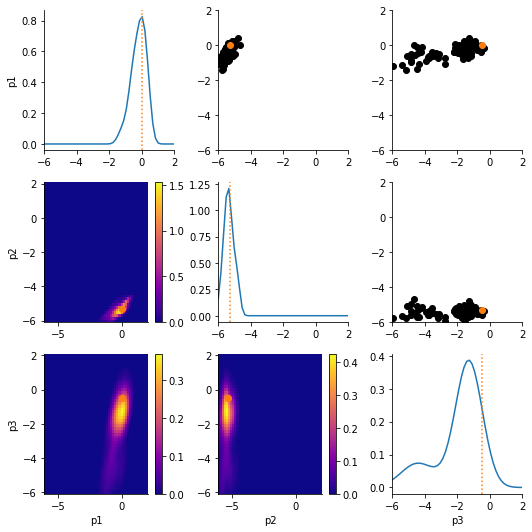

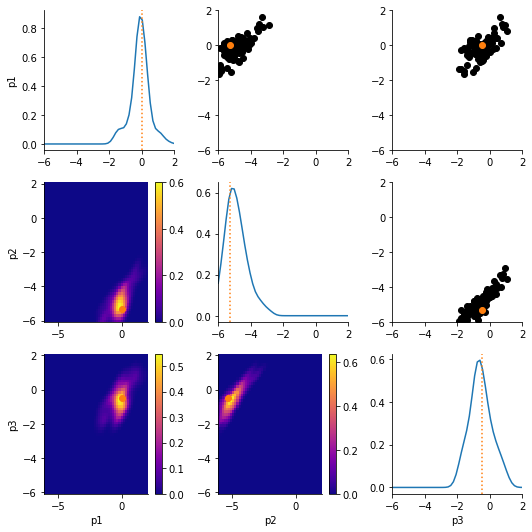

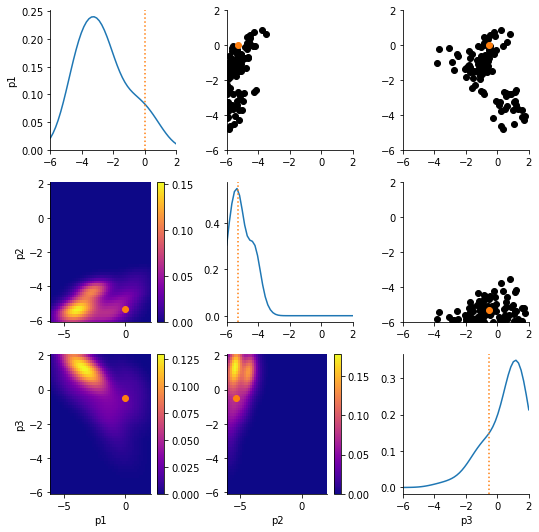

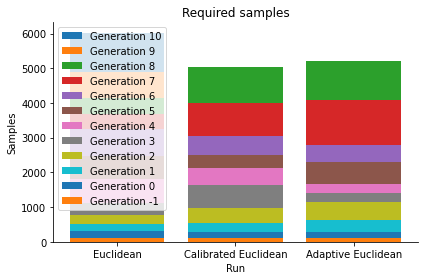

In [10]:
for h, label in zip(hs[:3], labels[:3]):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels[:3])